In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pltç
from atmosphere import atmosphere

%matplotlib inline

In [10]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

def knot2ms(Vknots):
    # convert from knots to m/s
    return(Vknots*0.514444)

def lb2N(x):
    # convert from lb to N
    return(x*4.44822)

def kg2N(x):
    # convert a mass in kg to a force in Newtons
    return(x*9.80665)

def fillbetween(x,y1,y2,c):
    plt.fill_between(x, y1, y2,
                     facecolor = c, # filling color
                     color = 'k', # outline color                     
                     alpha = 0.3)
    

In [5]:
# import the data
data = pd.read_csv('CASraw.csv', delimiter=',')
# numerical data
data_num = data.drop(columns=["A/C","STATUS","CREW","ENGINE"])

In [6]:
#visualize the data
data_num

,LENGTH [m],WIDTH [m],HEIGHT [m],EMPTY WEIGHT [Kg],MTOW [Kg],THRUST [lb],CEILING [m],RANGE [Km],SPEED [kts],S [m2]
0,12.72,9.64,4.87,4350,8000,6330.0,13200.0,1800.00,505.000,18.800
1,10.95,18.05,3.90,3000,7260,NaN,7620.0,1290.00,192.000,37.250
2,10.16,10.40,3.25,2670,4530,NaN,10700.0,2500.00,324.000,16.490
3,11.33,11.14,3.97,3020,11464,NaN,10670.0,2855.00,319.000,19.400
4,8.60,10.90,2.70,2815,6350,2850.0,12730.0,1500.00,440.000,17.090
5,16.16,17.42,4.42,13154,22950,18130.0,13636.0,1287.48,364.970,47.000
6,15.33,14.36,4.80,10740,20500,18960.0,7000.0,1375.00,513.000,33.700
7,11.84,15.25,4.78,5429,11340,NaN,8687.0,2115.00,172.000,37.192
8,15.20,NaN,4.95,9500,15800,1200.0,15000.0,3210.00,750.000,37.000
9,14.12,NaN,3.55,6340,14100,23500.0,2200.0,585.00,22.610,22.610


/home/legnaa98/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/legnaa98/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


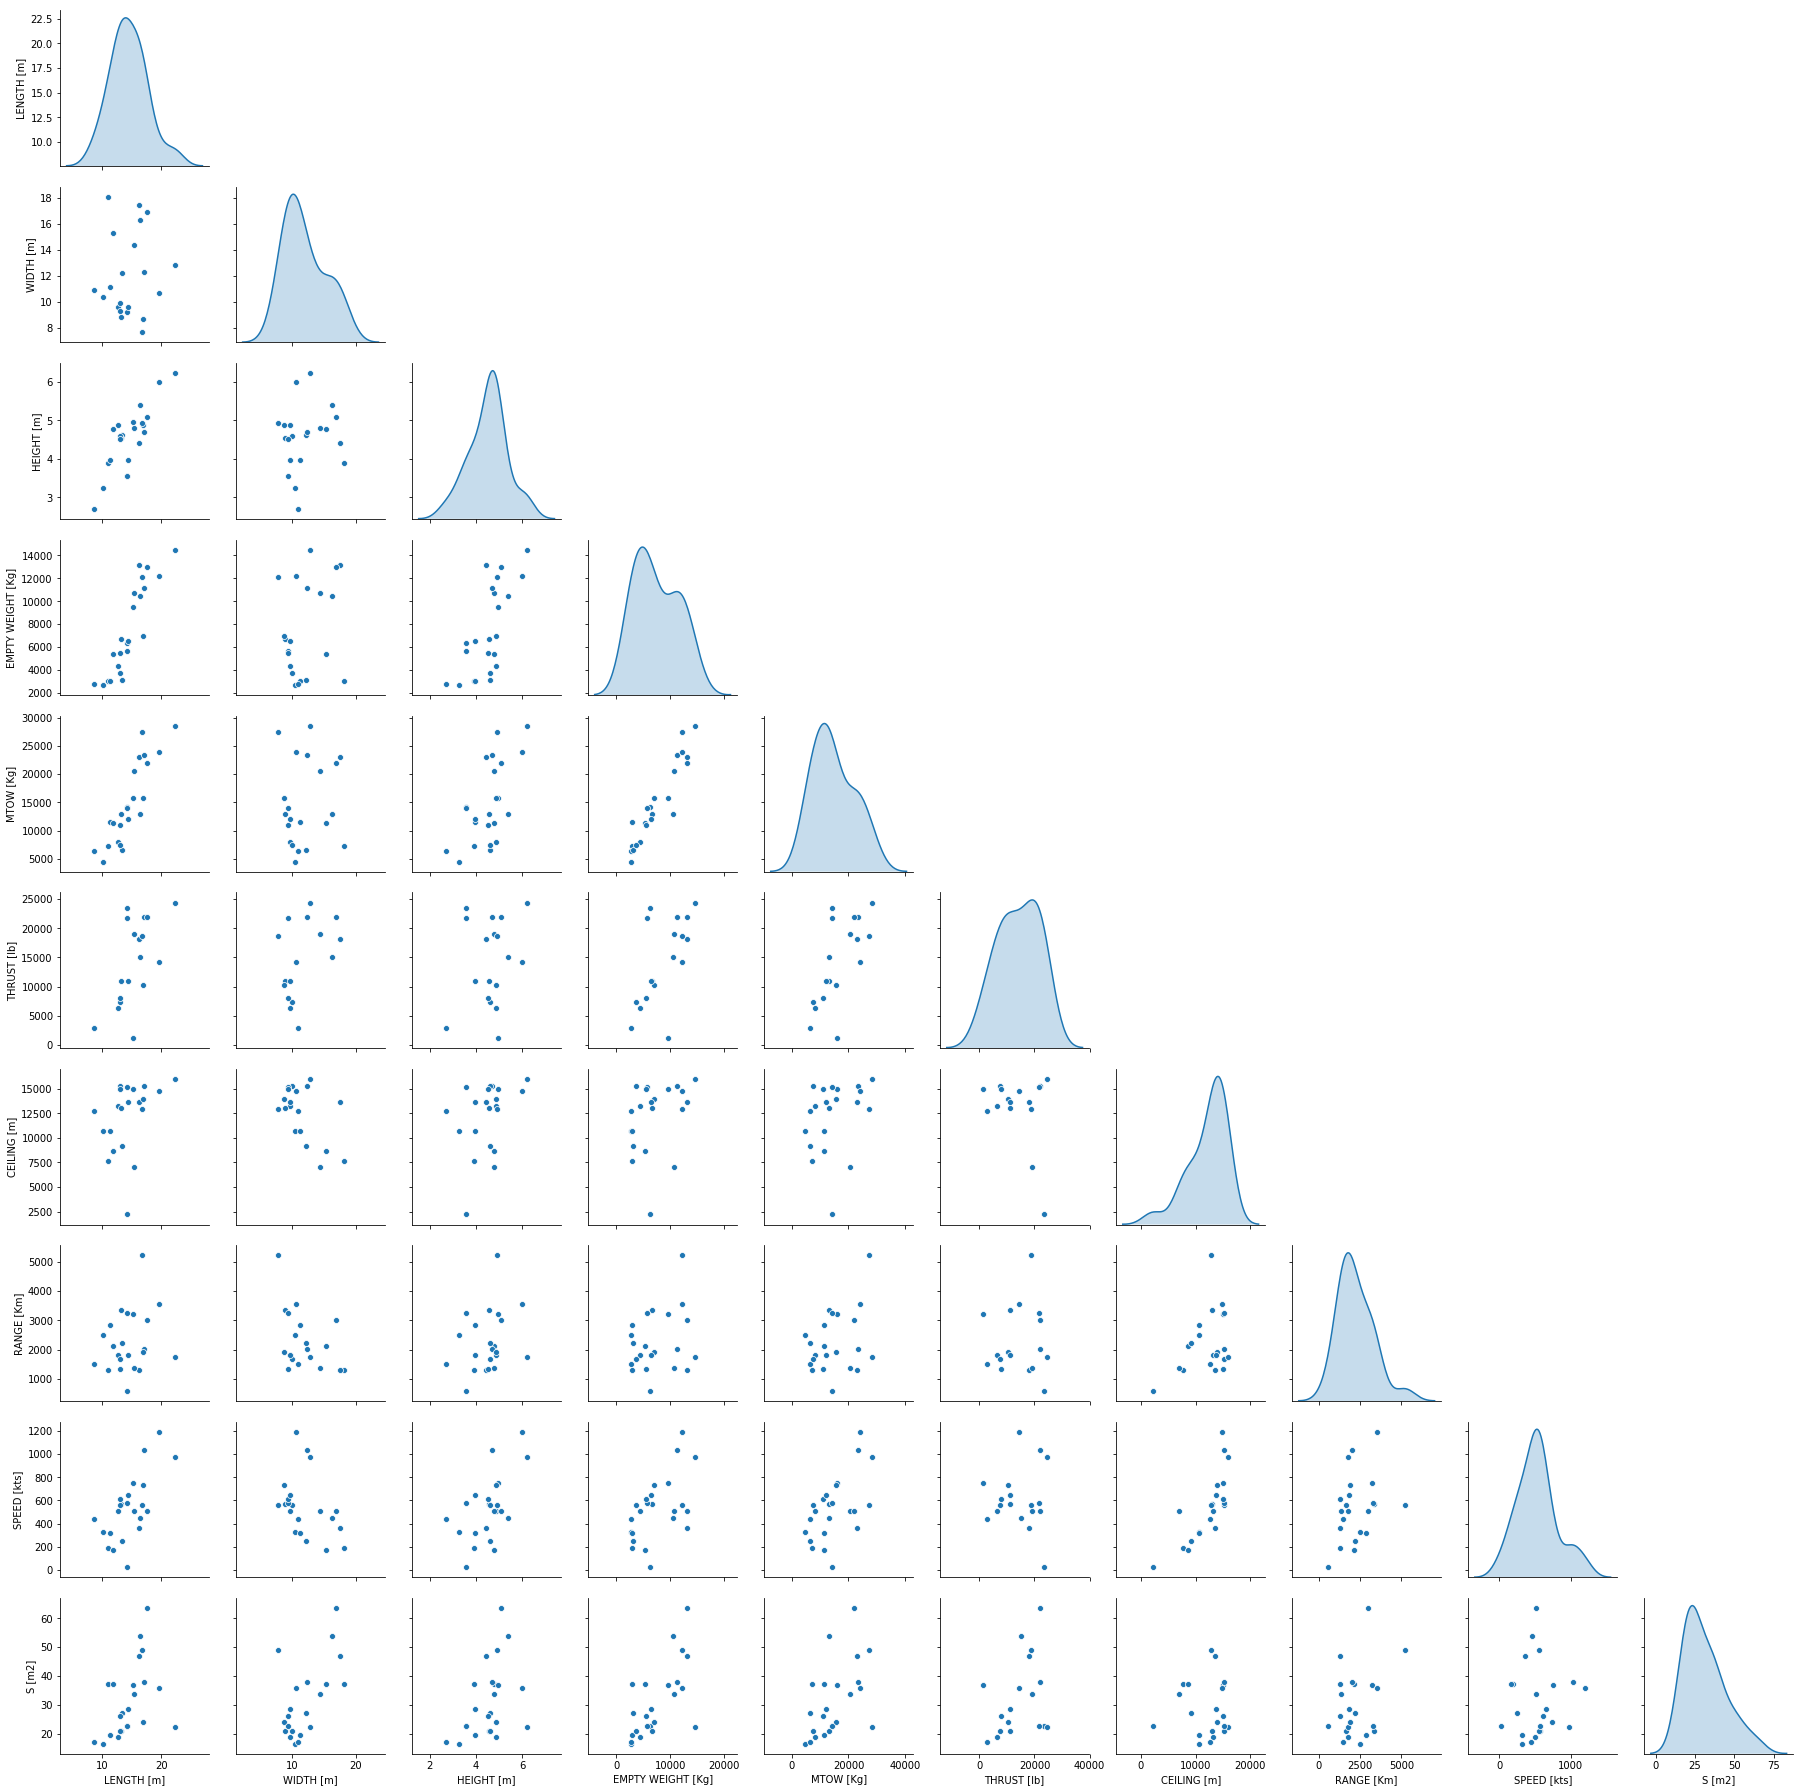

In [7]:
pairPlot = sns.pairplot(data_num, diag_kind='kde',)
pairPlot.map_upper(hide_current_axis)

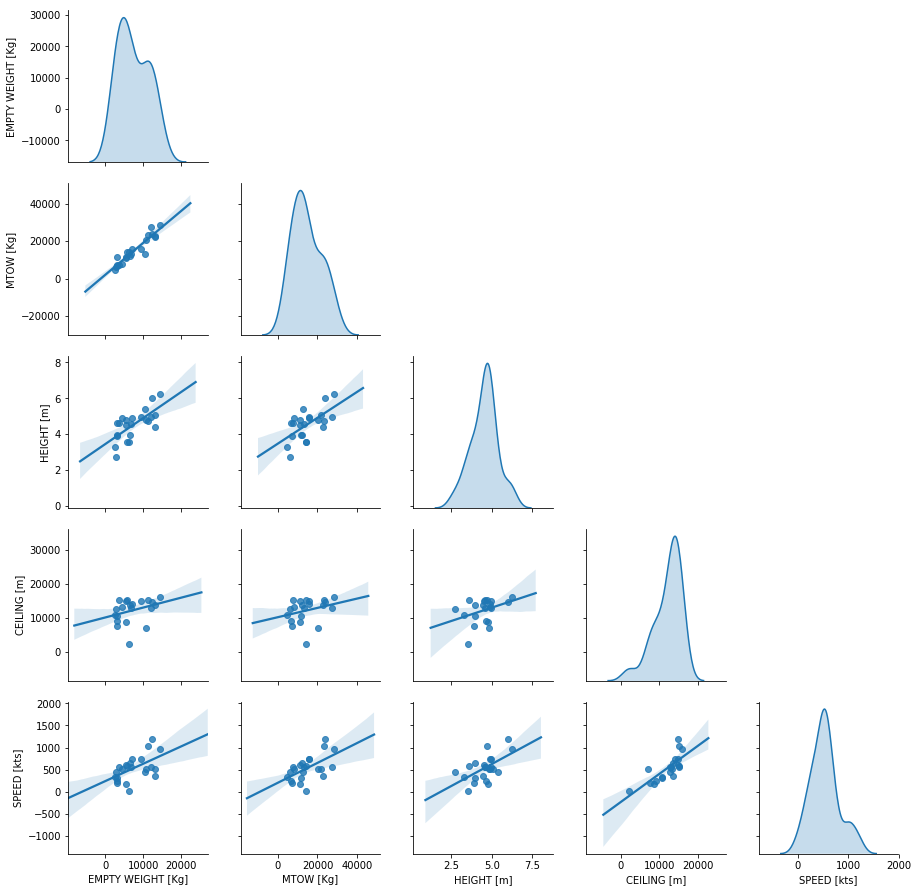

In [5]:
pairPlotRegressions = sns.pairplot(data, diag_kind='kde', kind='reg', vars=['EMPTY WEIGHT [Kg]', 'MTOW [Kg]','HEIGHT [m]','CEILING [m]', 'SPEED [kts]'])
pairPlotRegressions.map_upper(hide_current_axis)

In [6]:
pairPlotRegressions.savefig("Regressions.png")

(Text(0.5, 0, 'W/S [$N/m^2$]'), Text(0, 0.5, 'T/W'))

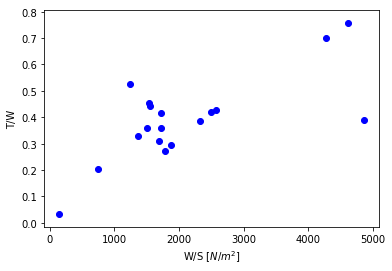

In [13]:
# Convert thrust from lbf to Newtons
ThrustInN = lb2N(data['THRUST [lb]']) # [N]
#Convert aircrafts' mass into weight
WeightInN = kg2N(data['MTOW [Kg]']) # [N]

# Compute Thrust to Weight Ratio
ThrustToWeightRatio = np.divide(ThrustInN, WeightInN) # Thrust to weight ratio with MOTW converted from lb to kg and then N (force)
# Compute wing load
WingLoad = np.divide(ThrustInN, data['S [m2]']) # [N/m2] W/S factor 


plt.scatter(WingLoad, ThrustToWeightRatio, color='blue')
plt.xlabel('W/S [$N/m^2$]'), plt.ylabel('T/W')

#print(ThrustToWeightRatio,"\n", WingLoad)

# Matching Chart

## Stall Speed $V_s$

<img src="./UsefulTabularDataFromBooks/CLmax_Roskam.png">

(W/S)_Vs <= 2801.056 N/(m2) for a Stall Speed of Vs = 61.733 m/s


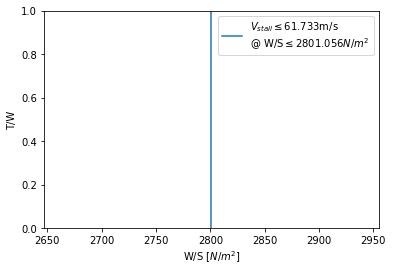

In [20]:
# Define useful constants
density_SL = atmosphere(0)[0] # [kg/m3] density at sea level

CLmaxRef = 1.2 # Taken from Roskam book. THIS VALUE CAN CHANGE TO MEET REQS.

# Wing Load @ stall speed function ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def WS_Stall(Vs,CLmax):
    
    WingLoad_VStall = np.round(0.5*density_SL*Vs**2*CLmax,3)
    return(WingLoad_VStall)
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
VStall = 120 # [knot] Taken from Sadraey book, may vary between (100,120) for jet fighters. The A10 has a VStall=120 knots. THIS VALUE CAN CHANGE TO MEET REQS.
VStall = np.round(knot2ms(VStall),3) # [m/s] 

# Compute Wing load @ stall speed
WingLoad_VStall = WS_Stall(VStall,CLmaxRef) # [m/s]

plt.axvline(x=WingLoad_VStall)
plt.legend(['$V_{stall}\leq$'+str(VStall)+'m/s\n@ W/S$\leq$'+str(WingLoad_VStall)+'$N/m^2$'])
plt.xlabel('W/S [$N/m^2$]'), plt.ylabel('T/W')

print('(W/S)_Vs <= '+str(WingLoad_VStall)+' N/(m2) for a Stall Speed of Vs = '+str(VStall)+' m/s')

### Maximum Speed $V_{max}$

In [23]:
# Define operating conditions based on altitude
altitude = 100 # [m] THIS VALUE CAN CHANGE TO MEET REQS.
density_alt, Pressure_alt, Temp_alt, SoundSpeed_alt = atmosphere(altitude) # Compute density, pressure, temperature and speed of sound in SI @ the altitude of operation

# Define Vmax based on RFP specifications
Vmax = knot2ms(900) # [m/s]

<img src="./UsefulTabularDataFromBooks/CDo_Sadraey.png">
<img src="./UsefulTabularDataFromBooks/TypicalAR_Sadraey.png">

In [24]:
# Compute the thrust to weight ratio with the formula given in Sadraey book
# Thrust to Weight Variation as a function of Max Speed -------------------------------------------------------------------------------------------------------------------------------------------------------
def TW_Vmax(Vmax,WS,AR,e,CDo,h):
    '''
    Inputs:
    Vmax : Max Speed [m/s]
    WS : Wing Load. W/S. [N/m2]
    AR : Aspect Ratio
    e : Oswald efficiency factor
    CDo : Zero Lift Drag Coefficeint
    h : Altitude. [m]
    
    Output:
    ThrustToWeight_Vmax : T/W ratio @ Vmax
    
    Variables:
    rho_alt : Density @ operating conditions. [kg/m3]
    rho_SL : Density @ mean sea level. [kg/m3]
    '''
    # compute densities through ISA model
    rho_SL = atmosphere(0)[0] 
    rho_alt = atmosphere(h)[0]
    
    sigma = rho_alt/rho_SL
    K = 1/(np.pi*e*AR)
    a = 0.5*CDo*rho_SL
    b = 2*K/(rho_alt*sigma)
    
    
    ThrustToWeight_Vmax = np.divide((a*Vmax**2), WS) + np.multiply(b/(Vmax**2), WS)
    return(ThrustToWeight_Vmax)
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, '$C_{D,o} = $0.03, e = 0.95, AR = 2.5')

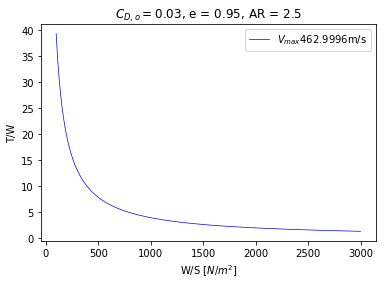

In [26]:
# Assume required values
C_Do = 0.03 # Zero drag. Taken as an average (slightly bigger) of Sadraey's typical values of zero lift drag in jet fighters . THIS VALUE CAN CHANGE TO MEET REQS.
Oswald = 0.95 # Oswald efficiency factor. THIS VALUE CAN CHANGE TO MEET REQS.
AR = 2.5 # Wing Aspect Ratio.THIS VALUE CAN CHANGE TO MEET REQS.

# Define the values within which the wing load will vary in the various functions
WingLoadVariation = np.linspace(100,3000,200) # [N/m2] vary wing load within the set values

ThrustToWeight_Vmax = TW_Vmax(Vmax, WingLoadVariation, AR, Oswald, C_Do, altitude)
plt.plot(WingLoadVariation, ThrustToWeight_Vmax, 'b-', linewidth=0.7)
plt.xlabel('W/S [$N/m^2$]'), plt.ylabel('T/W')

plt.legend(['$V_{max}$'+str(Vmax)+'m/s'])
plt.title('$C_{D,o} = $'+str(C_Do)+', e = '+str(Oswald)+', AR = '+str(AR))
#fillbetween(WingLoadVariation, ThrustToWeight_Vmax, 0, 'blue')

## Take-Off Run $S_{TO}$
<img src='./UsefulTabularDataFromBooks/RWY_Friction.png'>
<img src='./UsefulTabularDataFromBooks/CDoLG_CDLoHLG.png'>
<img src='./UsefulTabularDataFromBooks/CLc_CLflap.png'>
<img src='./UsefulTabularDataFromBooks/VR.png'>




In [7]:
# Thrust to Weight Variation as a function of Take-off run -------------------------------------------------------------------------------------------------------------------------------------------------------
def TW_S_TO(S_TO,Vs,m,CDo,AR,e,S,WS,h):
    '''
    Inputs:
    S_TO : Take-off run requirement. [m]
    Vs : Stall speed. [m/s]
    m : Aircraft MTOW. [kg]
    CDo : Aircraft zero lift drag coefficient
    AR : Aspect Ratio
    e : Oswald efficiency factor
    WS : Wing Load factor. [N/m2]
    mu : Runway Friction coefficient. Values can be taken from Sadraey's book
    h : Altitude of operation. [m]
    
    Output:
    ThrustToWeight_TO : T/W ratio @ take-off run. 
    
    Variables:
    CLR : Aircraft lift coefficient @ take-off rotation
    CD_TO : Aircraft drag coefficient @ take-off configuration
    CDo_LG : Landing gear drag coefficient. Can be taken from Sadraey's book
    CDo_HLD_TO : High lift device drag coefficient @ take-off configuration. Can be taken from Sadraey's book
    CL_TO : Aircraft lift coefficient @ take-off configuration
    CLc : Aircraft lift coefficient in cruise condition
    CLflapTO : Lift coefficient of flaps during take-off. Can be taken from Sadraey's book
    S : Wing area. [m2]
    V_R : Rotation speed. [m/s]
    g : Acceleration of gravity. [m/s2]
    '''
    
    # compute useful constants
    mu = 0.04 # Dry concrete asphalt
    g = 9.80665 # [m/s2]
    W = m*g # [N] aircraft weight. THIS VALUE CAN CHANGE TO MEET REQS.
    rho_alt = atmosphere(h)[0]
    K = 1/(np.pi*e*AR)
    V_R = 1.15*Vs
    
    #----------------------------------------------------------
    # drag coefficient @ take-off
    CDo_HLD_TO = 0.003 # THIS VALUE CAN CHANGE TO MEET REQS.
    CDo_LG = 0.006 # THIS VALUE CAN CHANGE TO MEET REQS.
    CDo_TO = CDo + CDo_LG + CDo_HLD_TO
    
    # lift coefficient @ take-off
    CLc = 0.07 # THIS VALUE CAN CHANGE TO MEET REQS.
    CLflapTO = 0.4 # THIS VALUE CAN CHANGE TO MEET REQS.
    CL_TO = CLc + CLflapTO
    #----------------------------------------------------------
    
    CD_TO = CDo_TO + K*CL_TO**2    
    CDG = CD_TO-mu*CL_TO
    
    CLR = 2*W/(rho_alt*S*V_R**2)
    
    ThrustToWeight_TO = ( mu - (mu + (CDG/CLR))*( np.exp(0.6*rho_alt*g*CDG*S_TO*(1/WS)) ) ) / \
                        ( 1 - np.exp(0.6*rho_alt*g*CDG*S_TO*(1/WS)) )
    return(ThrustToWeight_TO)
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
TakeOffRun = 1200 # [m] specified in the RFP for when the A10 was made
MTOWStat = np.average(data['MTOW [Kg]']) # [kg] initial MTOW estimate from data base. THIS VALUE CAN CHANGE TO MEET REQS.
WingAreaStat = np.average(data['S [m2]']) # [m2] initial wing estimate from data base. THIS VALUE CAN CHANGE TO MEET REQS.

ThrustToWeight_TO = TW_S_TO(TakeOffRun, VStall, MTOWStat, C_Do, AR, Oswald, WingAreaStat, WingLoadVariation, altitude)

plt.plot(WingLoadVariation, ThrustToWeight_TO, 'b-', linewidth=0.7)
plt.xlabel('W/S [$N/m^2$]'), plt.ylabel('T/W')

plt.legend(['$S_{TO}$'+str(TakeOffRun)+'m'])
plt.title('$C_{D,o} = $'+str(C_Do)+', e = '+str(Oswald)+', AR = '+str(AR))
fillbetween(WingLoadVariation, ThrustToWeight_TO, 0, 'blue')

NameError: name 'VStall' is not defined

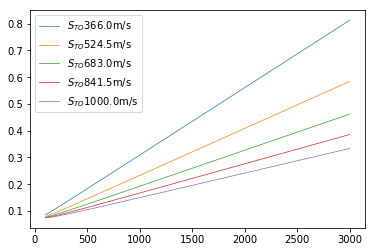

In [29]:
TOruns = np.linspace(366,1000,5)
TW_TO_cache =[]
legends = []

for t in range(len(TOruns)):
    TW_TO = TW_S_TO(TOruns[t], VStall, MTOWStat, C_Do, AR, Oswald, WingAreaStat, WingLoadVariation, altitude)
    TW_TO_cache.append(TW_TO)
    plt.plot(WingLoadVariation, TW_TO, '-', linewidth=0.7)

    l = '$S_{TO}$'+str(TOruns[t])+'m/s'
    legends.append(l)
plt.legend(legends)

(Text(0.5, 0, 'W/S [$N/m^2$]'), Text(0, 0.5, 'T/W'))

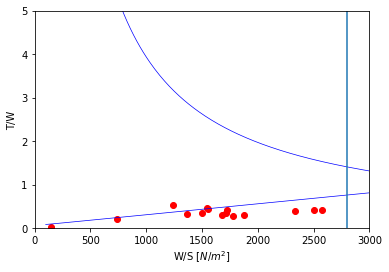

In [32]:
plt.plot(WingLoadVariation, TW_TO_cache[0], 'b-', linewidth=0.7)
plt.plot(WingLoadVariation, ThrustToWeight_Vmax, 'b-', linewidth=0.7)
plt.axvline(x=WingLoad_VStall)
plt.scatter(WingLoad, ThrustToWeightRatio, color='red')
plt.xlim([0,3000])
plt.ylim([0,5])
plt.xlabel('W/S [$N/m^2$]'), plt.ylabel('T/W')